<a href="https://colab.research.google.com/github/sandeepshabd/NLP_Masters/blob/master/week1/token_final_zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import ipdb
%pdb on

Automatic pdb calling has been turned ON


In [29]:
# tokenizer.py

import re
# 👇️ for Anaconda

import matplotlib.pyplot as plt
import numpy as np

from spacy.lang.en import English
nlp = English()
tokenizer = nlp.tokenizer
nlp.max_length = 100000000000000000000




```
# 👇️ for Anaconda
#conda install -c conda-forge spacy
#python -m spacy download en_core_web_sm
#python -m spacy download en

# Tokenizes a string. Takes a string (a sentence), splits out punctuation and contractions, and returns a list of
# strings, with each string being a token.
```



In [38]:
def readFile():
    f = open("/content/sample_data/nyt.txt", "r")
    string = f.read()
    f.close()
    doc = nlp(string)
    tok_exp = nlp.tokenizer.explain(string)
    return tok_exp

[('TOKEN', "CAN'T"),
 ('TOKEN', 'afford'),
 ('TOKEN', 'summer'),
 ('TOKEN', 'air'),
 ('TOKEN', 'fare'),
 ('TOKEN', 'to'),
 ('TOKEN', 'London'),
 ('SUFFIX', '?'),
 ('TOKEN', 'Then'),
 ('TOKEN', 'take'),
 ('TOKEN', 'a'),
 ('TOKEN', 'cheap'),
 ('TOKEN', 'seat'),
 ('TOKEN', 'in'),
 ('TOKEN', 'the'),
 ('TOKEN', 'living'),
 ('TOKEN', 'room'),
 ('TOKEN', 'section'),
 ('TOKEN', 'for'),
 ('TOKEN', 'telly'),
 ('TOKEN', 'nights'),
 ('TOKEN', 'on'),
 ('TOKEN', 'public'),
 ('TOKEN', 'channel'),
 ('TOKEN', 'WLIW'),
 ('SUFFIX', ','),
 ('TOKEN', 'where'),
 ('TOKEN', 'broad'),
 ('TOKEN', 'English'),
 ('TOKEN', 'accents'),
 ('TOKEN', 'are'),
 ('TOKEN', 'as'),
 ('TOKEN', 'common'),
 ('TOKEN', 'as'),
 ('TOKEN', 'fund'),
 ('INFIX', '-'),
 ('TOKEN', 'raising'),
 ('TOKEN', 'drives'),
 ('TOKEN', 'and'),
 ('TOKEN', 'the'),
 ('TOKEN', 'sensibility'),
 ('TOKEN', 'is'),
 ('TOKEN', 'equal'),
 ('TOKEN', 'parts'),
 ('TOKEN', 'London'),
 ('TOKEN', 'and'),
 ('TOKEN', 'Long'),
 ('TOKEN', 'Island'),
 ('SUFFIX', '.'),
 (

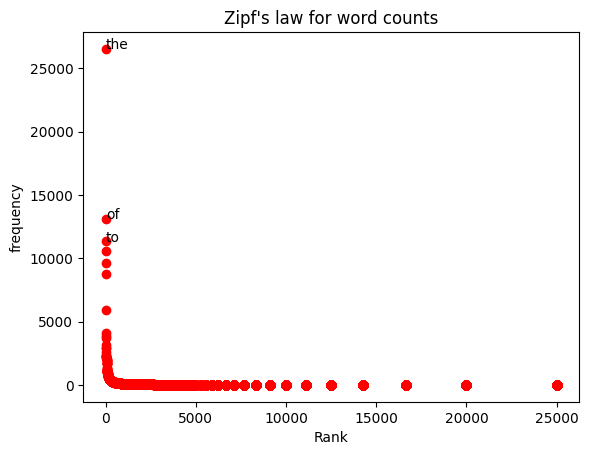

In [46]:

def readFileAndToeknize():
    wordCounter = {}
    stringArray = readFile()

    for wordSet in stringArray:
        word= wordSet[1]
        if(wordSet[0] == "TOKEN"):
            if(word in  wordCounter):
                wordCounter[word] += 1
            else:
                wordCounter[word] = 1

    #sortedByCount = sorted(wordCounter.items(),key=lambda x:x[1],)
    sortedByCount = sorted(wordCounter.items(),key=lambda x:x[1],reverse=True)
    countList = []
    wordList = []
    out_arr = []


    for eachDict in sortedByCount:

      if(eachDict[1] >3 ):
        #scaling the graph
        value = int(100000/eachDict[1])
        countList.append(eachDict[1])
        wordList.append(eachDict[0])
        out_arr.append(value)


    #show top 3
    for i in range(3):
      plt.text(out_arr[i],countList[i],wordList[i])
      #ax.annotate(wordList[i], (out_arr[i],countList[i]))

    plt.title("Zipf's law for word counts") #title
    plt.xlabel("Rank") #x label
    plt.ylabel("frequency") #y label

    plt.scatter(np.asarray(out_arr),np.asarray(countList),c='r')
    plt.show()
    #print(sortedByCount[:10])

"""     for key in  wordCounter:
        if(wordCounter[key] >5):
            print(key+":"+str(wordCounter[key]))
     """


def tokenize(string):
    # print(repr(string))
    string = re.sub(r"[^A-Za-z0-9(),.!?\'`\-\"]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r"\.", " . ", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\-", " - ", string)
    string = re.sub(r"\"", " \" ", string)
    # We may have introduced double spaces, so collapse these down
    string = re.sub(r"\s{2,}", " ", string)
    return list(filter(lambda x: len(x) > 0, string.split(" ")))

if __name__=="__main__":
   readFileAndToeknize()